<h2>Bitcoin basic analysis from 2014/09 to 2021/11 importing data of yahoo finance</h2>

In [207]:
import numpy as np
import pandas as pd
import cufflinks as cf 
import plotly.graph_objs as go
import yfinance as yf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers
yf.pdr_override()
pio.renderers.default = "svg"

In [208]:
init_notebook_mode(connected=True) # para conectar a biblioteca no notebook
cf.go_offline()

In [209]:
tickers = 'BTC-USD'

In [210]:
start='2014-09-22'
end='2021-11-08'

In [211]:
btc = yf.download(tickers,start=start,end=end,interval="1wk")
btc.fillna(method='bfill',inplace=True)
btc.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-22,399.100006,441.557007,374.332001,377.181000,377.181000,186772600
2014-09-29,376.928009,391.378998,289.295990,320.510010,320.510010,276657896
2014-10-06,320.389008,382.726013,302.559998,378.549011,378.549011,341152804
2014-10-13,377.920990,411.697998,368.897003,389.545990,389.545990,156902070
2014-10-20,389.230988,392.645996,342.877014,354.704010,354.704010,113691800


In [212]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,373.000000,373.000000,373.000000,373.000000,373.000000,3.730000e+02
mean,9930.420871,10813.766786,9146.055537,10111.107318,10111.107318,9.725721e+10
std,14693.673426,15943.527777,13510.736765,14988.048786,14988.048786,1.313035e+11
min,211.470993,231.712997,171.509995,210.339005,210.339005,8.067957e+07
25%,592.736023,611.836975,567.513977,600.825989,600.825989,5.481147e+08
50%,5791.693359,6434.209961,5216.487793,5830.254883,5830.254883,3.234097e+10
75%,9905.217773,10512.328125,9252.296875,9924.515625,9924.515625,1.607027e+11
max,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,7.666798e+11


<h2 style='color:rgb(240, 213, 36);font-weight:bold'>Part I</h2>
<h3>Simulating btc return in an investiment of $1000 in 2014/09/15 <br>
With pyfolio library to analyze a tear sheet of this investment</h3>

In [213]:
retorno = btc.pct_change() # making percentage variation for line to line
retorno.dropna(inplace=True)
retorno = retorno['Adj Close']  # taking just the adjusted close
retorno

Date
2014-09-29   -0.150249
2014-10-06    0.181083
2014-10-13    0.029050
2014-10-20   -0.089443
2014-10-27   -0.081228
                ...   
2021-10-11    0.123824
2021-10-18   -0.010118
2021-10-25    0.006370
2021-11-01    0.032747
2021-11-08    0.066952
Name: Adj Close, Length: 372, dtype: float64

In [214]:
# cumprod = produto cumulativo de uma série
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0]=1
retorno_acumulado

Date
2014-09-29      1.000000
2014-10-06      1.003627
2014-10-13      1.032783
2014-10-20      0.940408
2014-10-27      0.864020
                 ...    
2021-10-11    163.193844
2021-10-18    161.542697
2021-10-25    162.571702
2021-11-01    167.895489
2021-11-08    179.136351
Name: Adj Close, Length: 372, dtype: float64

In [215]:
# If had done an investment of $1000 in 2014/10, just guessing 😭
investimento_btc = 1000*retorno_acumulado
investimento = pd.DataFrame(investimento_btc)
investimento['Retorno'] = investimento.pct_change()
investimento

,Adj Close,Retorno
Date,,
2014-09-29,1000.000000,NaN
2014-10-06,1003.626936,0.003627
2014-10-13,1032.782643,0.029050
2014-10-20,940.407948,-0.089443
2014-10-27,864.020188,-0.081228
...,...,...
2021-10-11,163193.843877,0.123824
2021-10-18,161542.696946,-0.010118
2021-10-25,162571.701838,0.006370


In [216]:
import pyfolio as pf 

Start date,2014-09-29
End date,2021-11-08
Total months,17
,Backtest
Annual return,3260.085%
Cumulative returns,17813.635%
Annual volatility,166.93%
Sharpe ratio,2.96
Calmar ratio,39.28
Stability,0.89
Max drawdown,-83.006%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,83.01,2017-12-11,2018-12-10,2020-11-30,776
1,47.19,2021-04-05,2021-07-12,2021-10-11,136
2,46.0,2014-10-13,2015-01-12,2015-12-07,301
3,34.76,2017-06-05,2017-07-10,2017-07-31,41
4,25.31,2016-06-13,2016-08-08,2016-11-28,121


Stress Events,mean,min,max
Oct14,-3.45%,-8.94%,2.91%
Fall2015,-1.03%,-11.74%,4.84%
New Normal,1.96%,-33.49%,41.48%


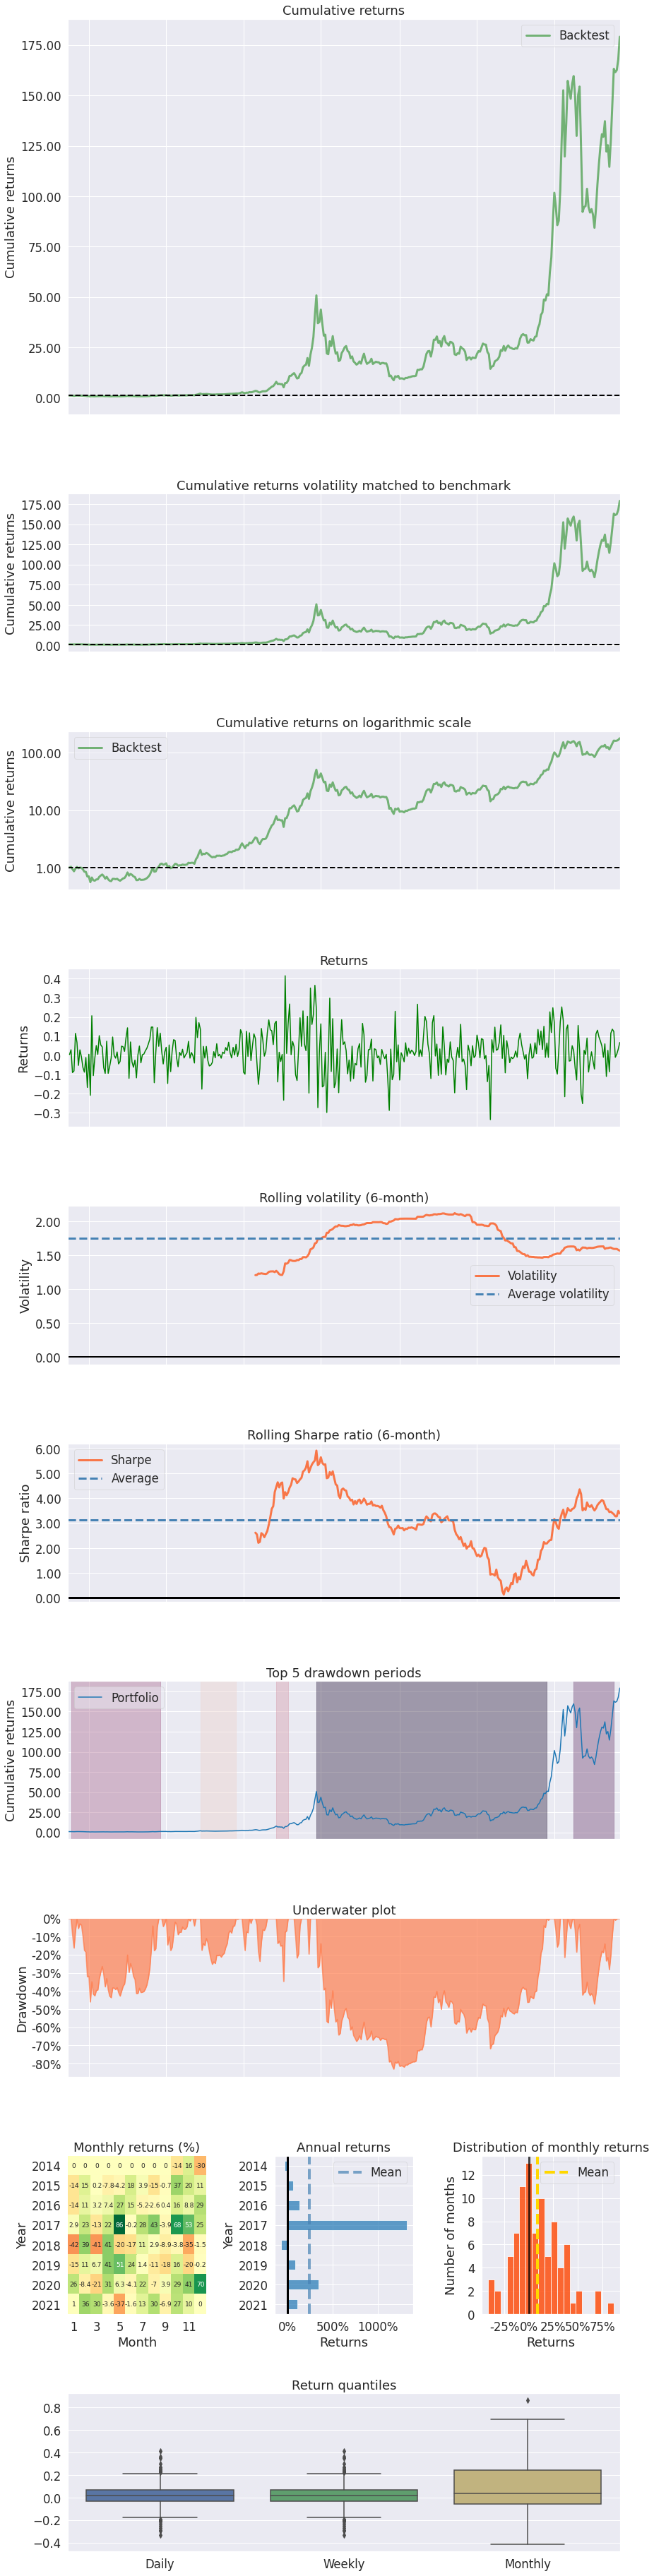

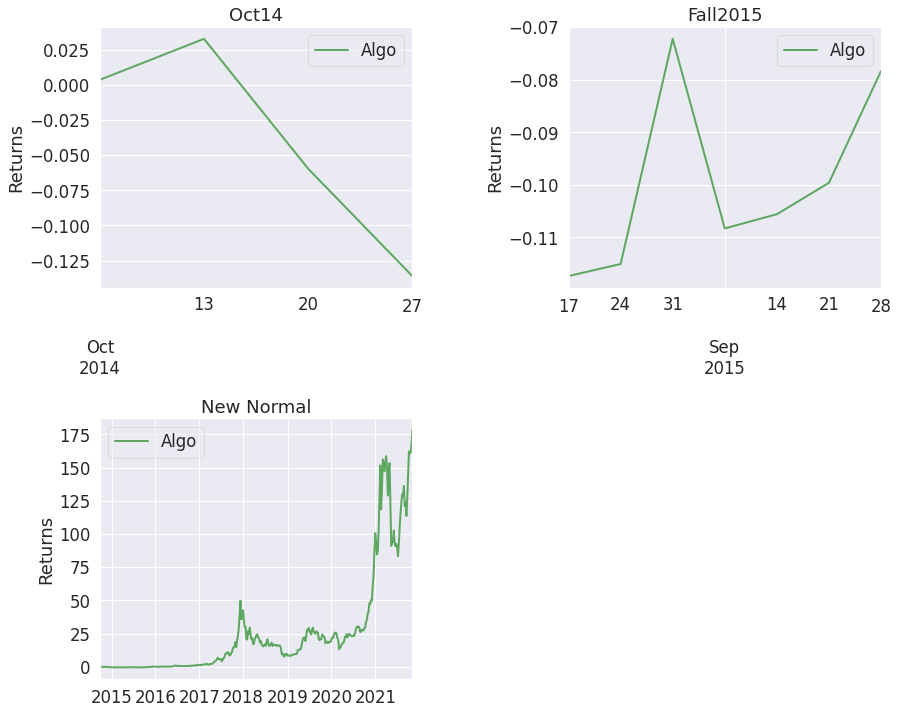

In [217]:
pf.create_full_tear_sheet(investimento["Retorno"])

<h2 style='color:rgb(240, 213, 36);font-weight:bold'>Part II</h2>
<h3>Historical candlestick and analysis of some drawdowns</h3>
<i>using the plotly library</i>

In [218]:
class propriedades():
    def __new__(self,**kw):
        dic1 = dict(
            borderpad=4,
            borderwidth=1.5,
            bordercolor='rgb(50,55,60,0.40)',
            bgcolor='rgb(242,242,242,0.95)',
            arrowwidth=1.5,
            arrowhead=2,
            yref='y',
            xref='x',
            showarrow=True, 
            font=dict(
                size=9.5,
                family='monospace'
            )
            )
        self.dic2 = kw
        return dict(**self.dic2,**dic1)
         

In [219]:
crash_2017 = {'x':'2017-12-11',
    'y':'20000',
    'text':'Bitcoin bubble crash, and hacking attacks in Korea and Japan'}
crash_dec_2017 = propriedades(**crash_2017)

musk_china = {
    'x':'2021-04',
    'y':'60000',
    'ax':-20,
    'text':'Tesla and China against btc, enviroment concerns, cryptocurrency tax bill USA',
    'startarrowsize':5
}

musk_china_ban_bitcoin = propriedades(**musk_china)

china_ban = {
    'x':'2021-09',
    'y':'45000',
    'ax':10,
    'ay':100,
    'align':'right',
    'text':'China banned criptocurrencies',
}

china_ban = propriedades(**china_ban)

In [220]:
annotations = [
    crash_dec_2017, 
    musk_china_ban_bitcoin,
    china_ban
]

In [221]:
layout = go.Layout(
    title = "Historical Candlestick BTC",
    yaxis_title="$",
    annotations=annotations,
    hovermode='closest'
)
data = [go.Candlestick(x=btc.index, 
open = btc['Open'], 
high=btc['High'], 
low=btc['Low'],
close=btc['Close']
)]
btc.iplot(kind='box',data=data,layout=layout)


<h2 style='color:rgb(240, 213, 36);font-weight:bold'>Part III</h2>
<h3>Comparating Bitcoin, Nasdaq and Gold 1 oz</h3>


In [222]:
# importing data from yahoo finance of Nasdaq and Gold 1 oz
gold = yf.download('GOLD 1 OZ',start=start,end=end,interval="1wk")
nasdaq = yf.download('ndaq',start=start,end=end,interval="1wk")

[*********************100%***********************]  3 of 3 completed

1 Failed download:
- 1: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [223]:
gold = gold['Adj Close']
gold = gold['GOLD']

Now the intend is normalize this datas

In [224]:
gold.fillna(method='bfill',inplace=True)
gold=gold.groupby(pd.Grouper(freq='M')).mean()
gold_return = gold.pct_change()
gold_return.dropna(inplace=True)
gold_return_ac = (1+gold_return).cumprod()
gold_return_ac.iloc[0]=1
gold_return_ac

Date
2014-10-31    1.000000
2014-11-30    0.827006
2014-12-31    0.755991
2015-01-31    0.818649
2015-02-28    0.859966
                ...   
2021-07-31    1.555761
2021-08-31    1.487218
2021-09-30    1.374863
2021-10-31    1.407869
2021-11-30    1.461946
Freq: M, Name: GOLD, Length: 86, dtype: float64

In [225]:
nasdaq = nasdaq.groupby(pd.Grouper(freq='M')).mean()
nasdaq_return = nasdaq.pct_change()
nasdaq.fillna(method='bfill',inplace=True)
nasdaq_return.dropna(inplace=True)
nasdaq_return = nasdaq_return['Adj Close']
nasdaq_return_ac = (1+nasdaq_return).cumprod()
nasdaq_return_ac.iloc[0]=1
nasdaq_return_ac

Date
2014-10-31    1.000000
2014-11-30    1.037648
2014-12-31    1.115992
2015-01-31    1.101587
2015-02-28    1.177422
                ...   
2021-07-31    4.825794
2021-08-31    5.087355
2021-09-30    5.171647
2021-10-31    5.391372
2021-11-30    5.652373
Freq: M, Name: Adj Close, Length: 86, dtype: float64

In [226]:
btc = btc.groupby(pd.Grouper(freq='M')).mean() # grouping by month-to-month
btc_return_month = btc.pct_change() # making percentage variation for line to line
btc_return_month.dropna(inplace=True)
btc_return_month = btc_return_month['Adj Close']  # taking just the adjusted close
btc_return_month_ac = (1+btc_return_month).cumprod()
btc_return_month_ac.iloc[0]=1
btc_investment=1000*btc_return_month_ac

<h2>Comparating an investment of $1000 between de tickers

In [227]:
gold_investment = 1000*gold_return_ac
nasdaq_investment = 1000*nasdaq_return_ac
comparing = pd.DataFrame(data=[btc_investment,nasdaq_investment,gold_investment])
comparing = comparing.T
comparing.columns = ['Bitcoin','Nasdaq','Gold']
comparing.dropna(inplace=True)
comparing

,Bitcoin,Nasdaq,Gold
Date,,,
2014-10-31,1000.000000,1000.000000,1000.000000
2014-11-30,1072.656786,1037.648102,827.006487
2014-12-31,933.940083,1115.991771,755.991395
2015-01-31,685.610820,1101.586672,818.649112
2015-02-28,683.981868,1177.422106,859.965780
...,...,...,...
2021-07-31,101307.081608,4825.794149,1555.760701
2021-08-31,138026.726639,5087.355495,1487.218023
2021-09-30,132388.104439,5171.646828,1374.863183


In [228]:
comparing.iplot()

In [229]:
retorno_btc_vs_gold = pd.DataFrame(data=[btc_return_month,gold_return]).T
retorno_btc_vs_gold.columns=['Bitcoin','Gold']
retorno_btc_vs_gold.dropna(inplace=True)
retorno_btc_vs_gold.iplot(kind='bar',colors=['#FFA15A','rgb(255,65,10)'],title="Month-to-month variation Bitcoin vs Gold")

In [230]:
retorno_btc_vs_nasdaq = pd.DataFrame(data=[btc_return_month,nasdaq_return]).T
retorno_btc_vs_nasdaq.columns=['Bitcoin','Nasdaq']
retorno_btc_vs_nasdaq=retorno_btc_vs_nasdaq.groupby(pd.Grouper(freq='M')).mean()
retorno_btc_vs_nasdaq.iplot(kind='bar',colors=['#FFA15A','rgb(10,75,200)'],title="Month-to-month variation Bitcoin vs Nasdaq")
